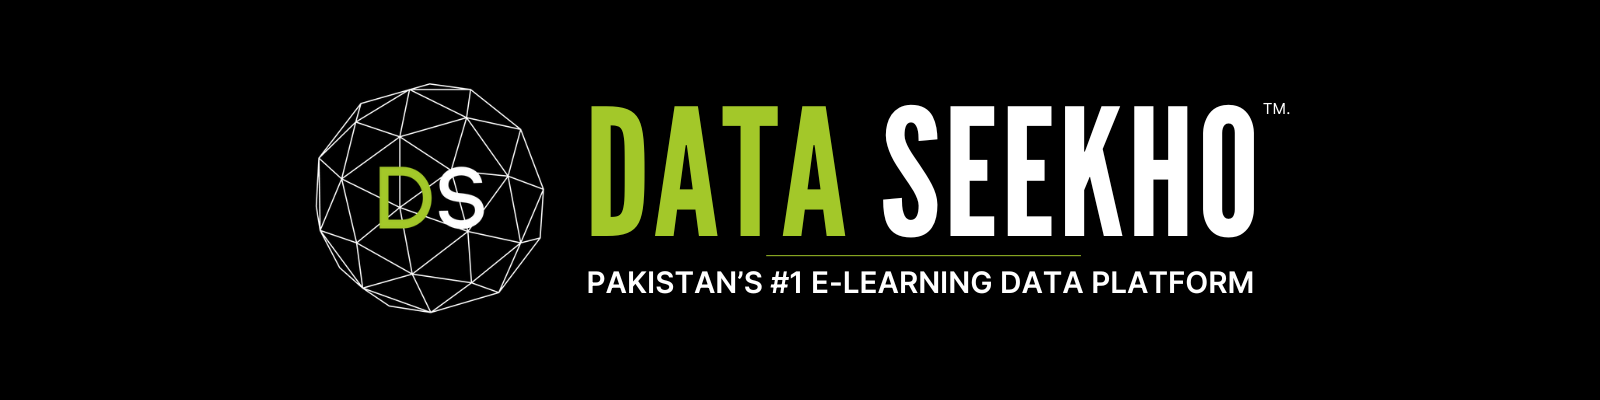

# Hi, I'm Hafeezullah 👋

Welcome to my GitHub profile! I'm currently a **Machine Learning Bootcamp Fellow** at [Data Seekho](https://dataseekho.com), where I'm honing my expertise in machine learning, data science, and artificial intelligence. I am driven by a passion for solving real-world challenges through data-driven solutions and am committed to deepening my knowledge and skills in this dynamic field.


---

## 🌟 About Me
- 🎓 **Education**: Bachelor’s in Mathematics from Sukkur IBA University
- 💻 **Skills**: Python, SQL, Machine Learning, Data Visualization, Pandas, NumPy, Scikit-Learn, TensorFlow, Matplotlib, Seaborn
- 🌱 **Currently Learning**: Python, Data Analytics, and Advanced Data Science techniques
- 🤝 **Looking to collaborate on**: Open-source data science projects and machine learning competitions
- 🔭 **Research Interests**: Data Science, AI Ethics, Predictive Modeling, Generative AI
- 📫 **How to reach me**: hafeezullahrahoojo99@gmail.com | www.linkedin.com/in/hafeezullah-rahoojo-0552a9202

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

**Load the Data**

In [2]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
data = pd.read_csv(list(uploaded.keys())[0])
#data = pd.read_csv('heart dataset.csv')

Saving heart dataset.csv to heart dataset.csv


**Display the first few rows and basic information about the dataset**

In [3]:
print(data.head())
print(data.info())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

**Check for missing values**

In [4]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**Descriptive statistics**

In [5]:
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

**Correlation matrix**

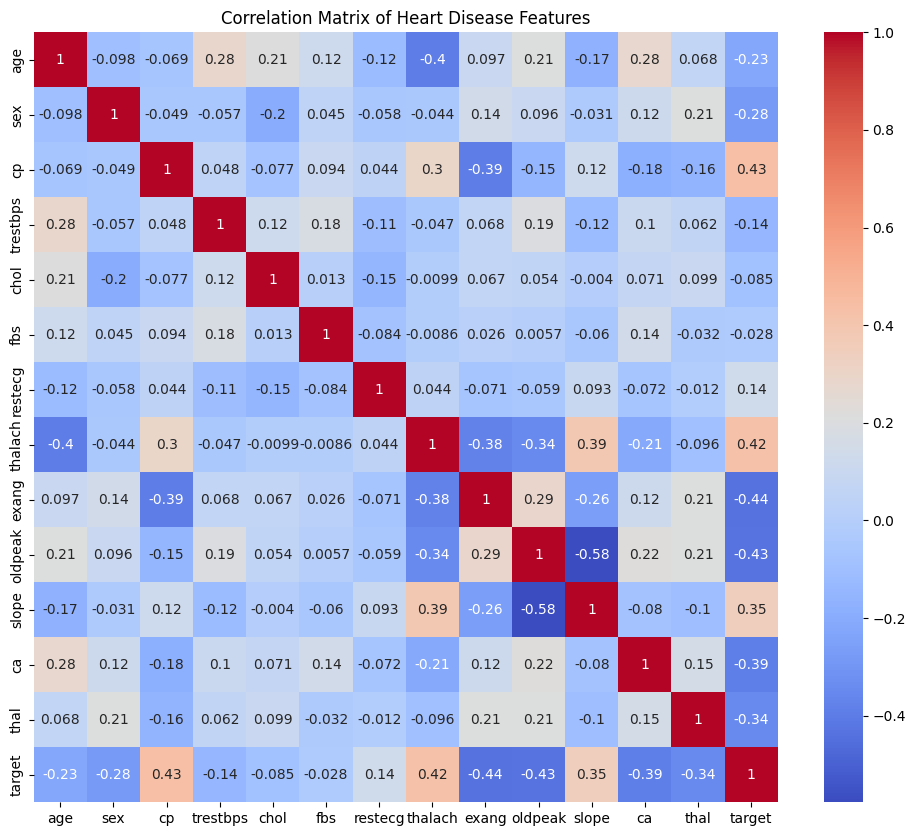

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Heart Disease Features')
plt.show()

**Distribution of the target variable**

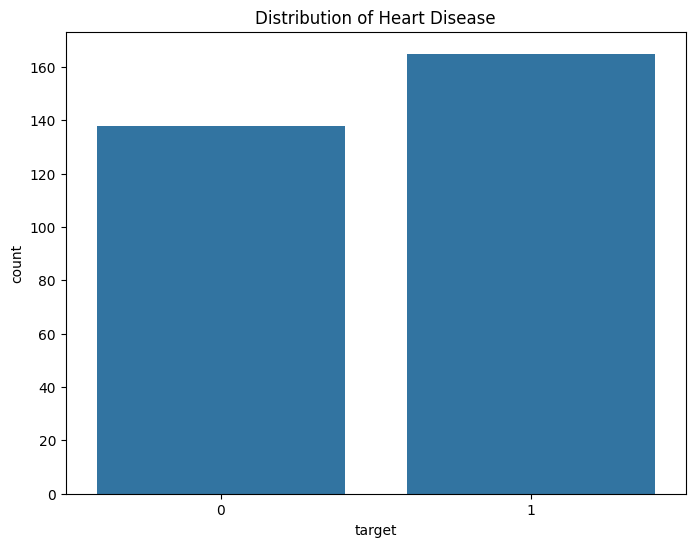

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data)
plt.title('Distribution of Heart Disease')
plt.show()

**Feature distributions**

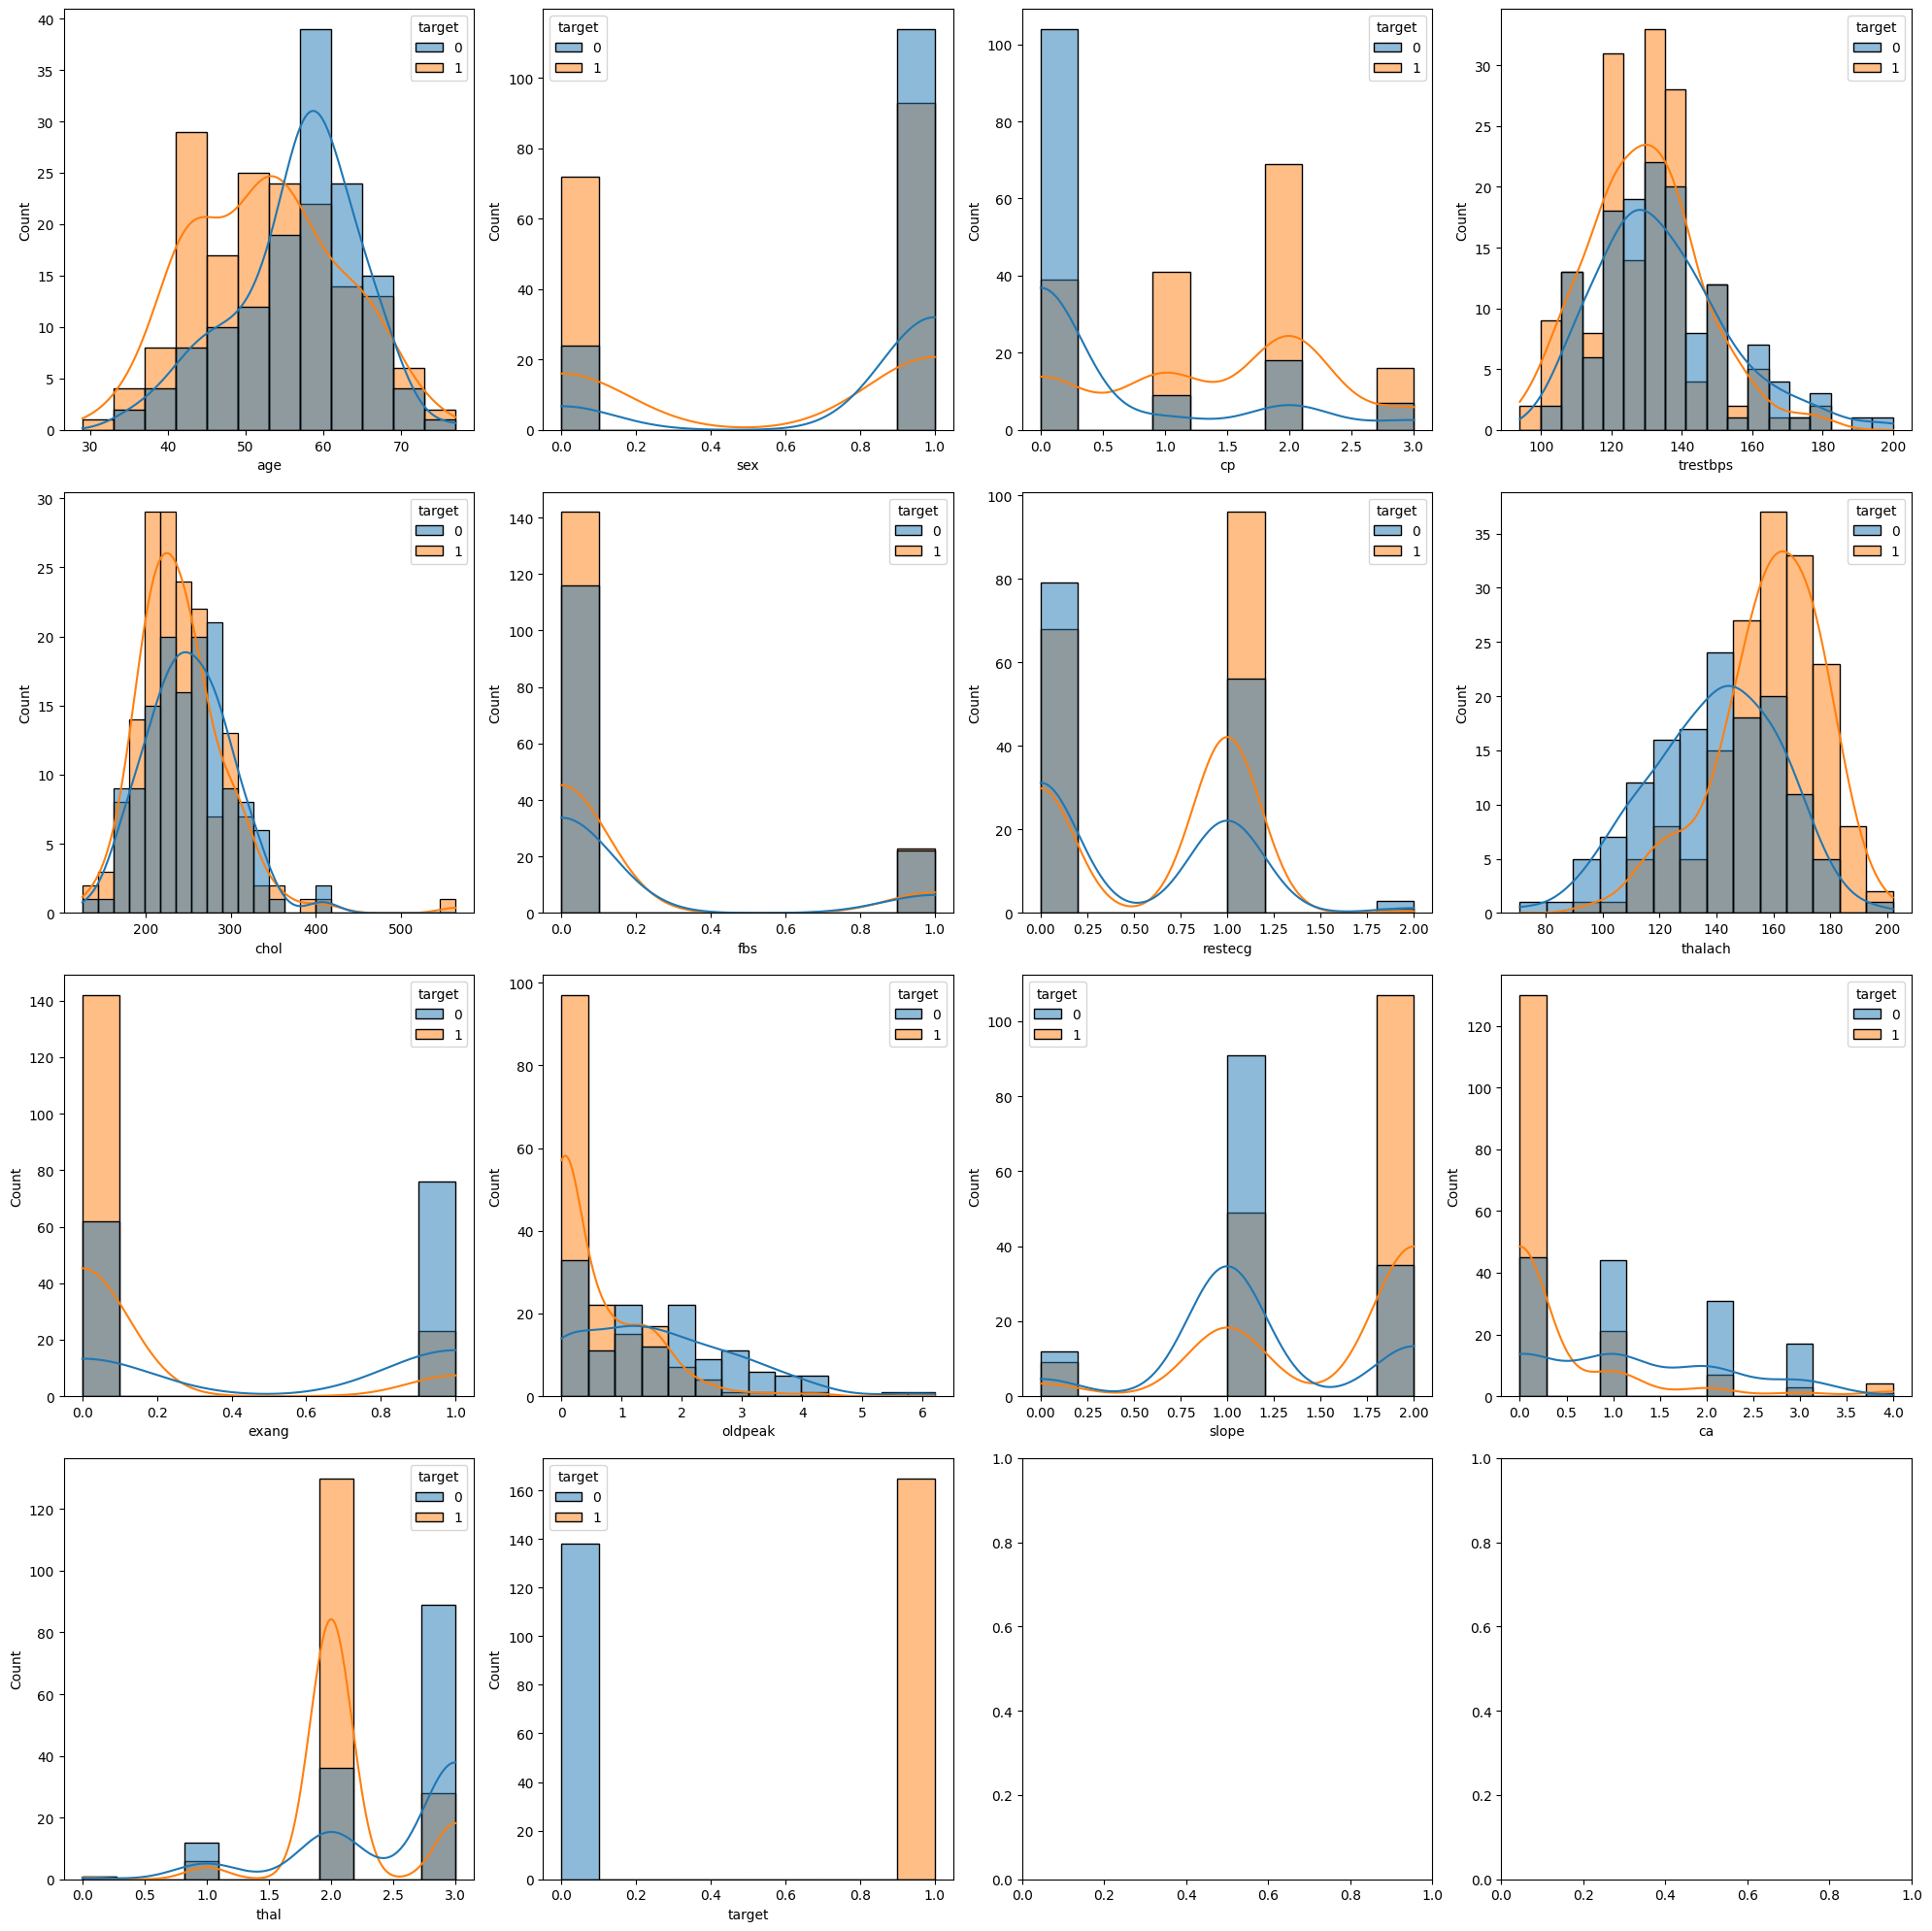

In [8]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, col in enumerate(data.columns):
    sns.histplot(data=data, x=col, hue='target', ax=axes[i//4, i%4], kde=True)
plt.tight_layout()
plt.show()

**Prepare the data for modeling**

In [10]:
X = data.drop('target', axis=1)
y = data['target']


**Split the data**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Scale the features**

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Define models**

In [14]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}


**Train and evaluate models**

In [15]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Logistic Regression Results:
Accuracy: 0.8525
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
[[25  4]
 [ 5 27]]

Decision Tree Results:
Accuracy: 0.8361
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61

Confusion Matrix:
[[27  2]
 [ 8 24]]

Random Forest Results:
Accuracy: 0.8361
Classification Report:
              precision    recall  f1-score   support

           0       

**Cross-validation**

In [16]:
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"\n{name} Cross-Validation Scores: {scores}")
    print(f"Mean CV Score: {scores.mean():.4f}")


Logistic Regression Cross-Validation Scores: [0.7755102  0.89795918 0.77083333 0.85416667 0.79166667]
Mean CV Score: 0.8180

Decision Tree Cross-Validation Scores: [0.7755102  0.75510204 0.79166667 0.72916667 0.72916667]
Mean CV Score: 0.7561

Random Forest Cross-Validation Scores: [0.81632653 0.83673469 0.79166667 0.8125     0.79166667]
Mean CV Score: 0.8098

SVM Cross-Validation Scores: [0.7755102  0.83673469 0.8125     0.85416667 0.83333333]
Mean CV Score: 0.8224


**Feature importance (using Random Forest)**

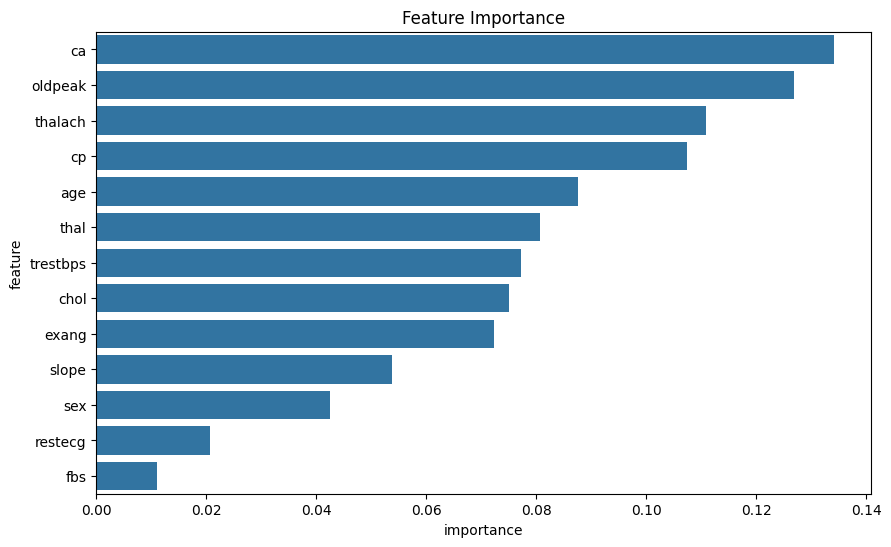

In [17]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

**Feature selection**

In [18]:
selector = SelectKBest(f_classif, k=5)
X_selected = selector.fit_transform(X_train_scaled, y_train)
selected_features = X.columns[selector.get_support()].tolist()
print("Top 5 selected features:", selected_features)

Top 5 selected features: ['cp', 'thalach', 'exang', 'oldpeak', 'ca']


**PCA**

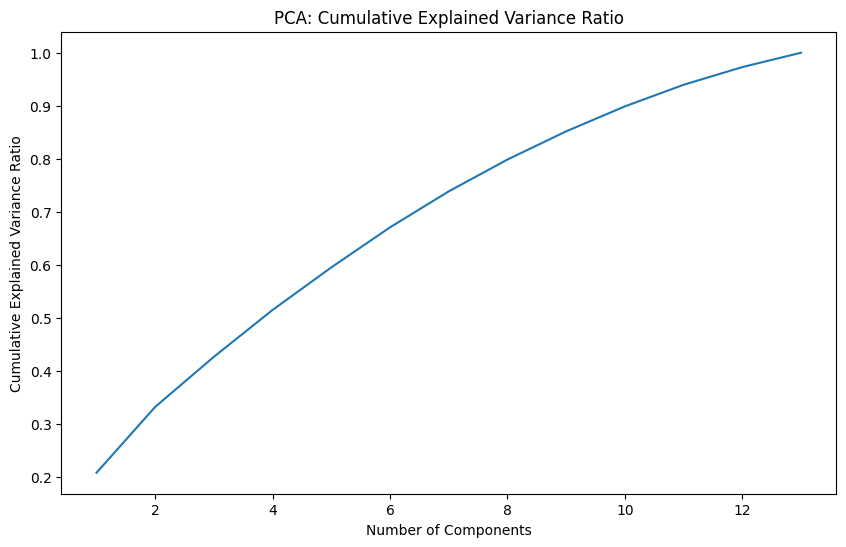

In [19]:
pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Cumulative Explained Variance Ratio')
plt.show()

**Hyperparameter tuning (Random Forest as an example)**

In [20]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score: 0.8139455782312925


**Final model evaluation**

In [21]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)
print("\nFinal Random Forest Model Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Final Random Forest Model Results:
Accuracy: 0.8689
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
[[25  4]
 [ 4 28]]


**ROC Curve and AUC Score**

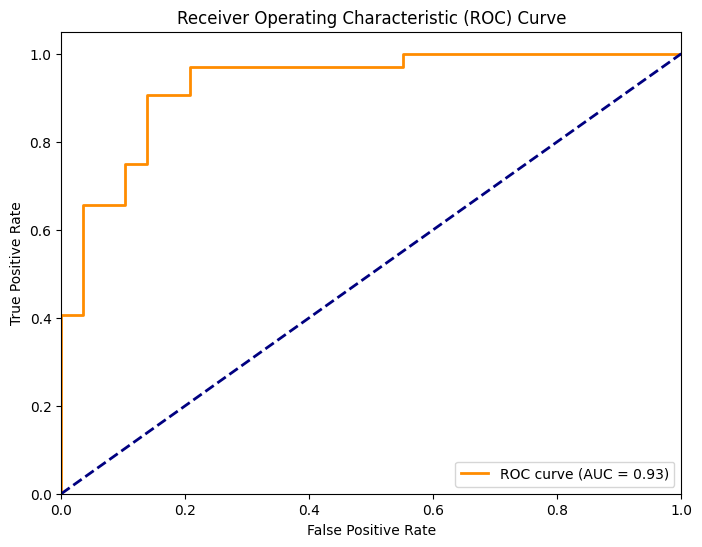

In [22]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = best_rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Learning Curve**

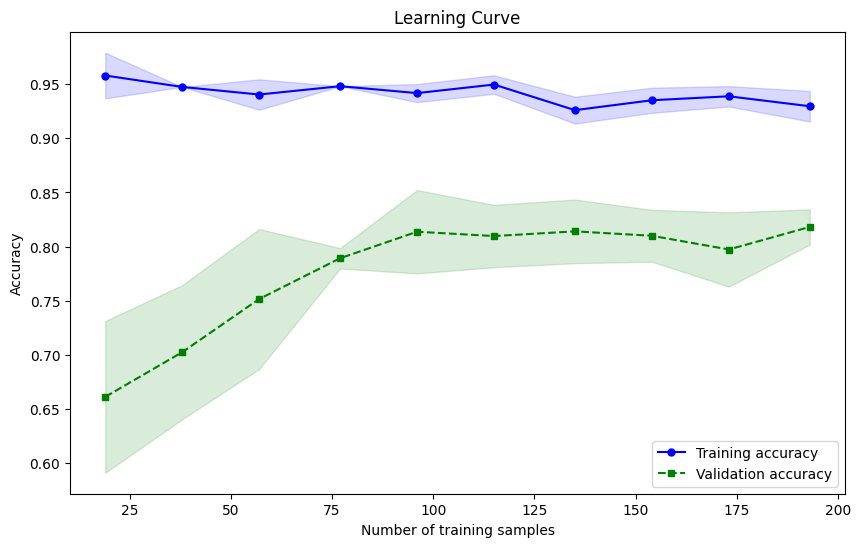

In [23]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()


**Feature Importance Visualization**

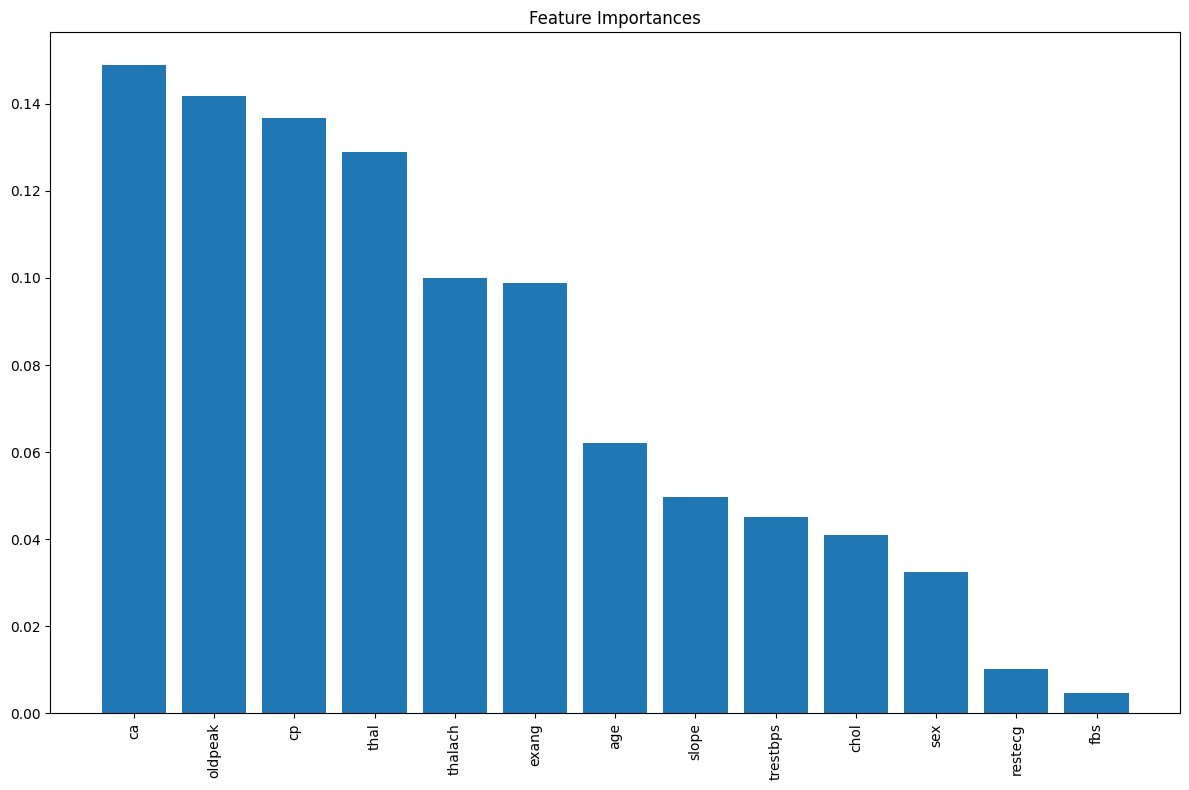

In [26]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()